In [1]:
import matplotlib.pylab as plt
%matplotlib inline  
import numpy as np

## Hill functions: cooperative reaction kinetics

A rate law for transcription describes the rate at which gene $Y$ is transcribed as a function of concentration of (transcription factor) protein $X$, denoted $x$. A common choice for such a rate law $r(x)$ is a family of functions called <i> Hill functions </i>. 

These are used for describing the kinetics of chemical reactions that involve <i> cooperative binding </i>: the binding of each additional ligand to its target increases the binding affinity of other molecules of the same ligand (i.e., increases the rate at which additional ligands bind). In terms of gene expression, we use these rate laws to describe the cooperativity of transcription factors binding to the promoter region of a gene.

For a derivation of the following expressions, see Edelstein-Keshet textbook, Chapter 7 (linked on Canvas).

##### Activator kinetics:

$$
r(x) = \frac{\beta x^n}{K^n + x^n} \, .
$$


##### Repressor kinetics:

$$
r(x) = \frac{\beta K^n}{K^n + x^n}
$$

Parameters: 
- $\beta = $ maximum transcription rate
- $K = $ concentration of $X$ that produces rate $r = \beta/2$ (half maximum point)
- $n = $ Hill coefficient, degree of cooperativity (~ number of molecules needed bound to get effect)

In [2]:
def hill_activate(x, beta, K, n):
    return (beta*x**n)/(K**n + x**n)

def hill_repress(x,beta,K,n):
    return (beta*K**n)/(K**n + x**n)

In [22]:
beta = 1
K = 7
n = 3

x = np.linspace(0,20,100)

Text(0, 0.5, 'Transcription rate of Y')

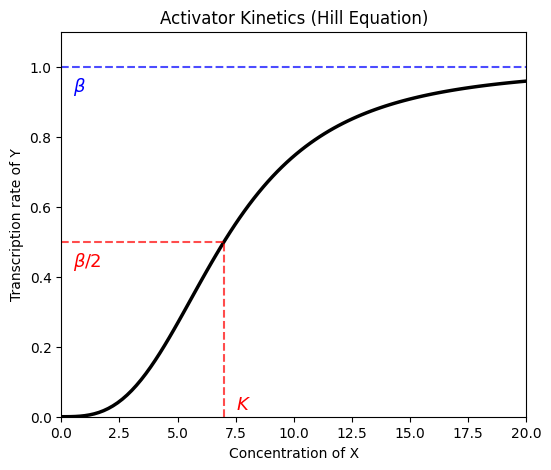

In [23]:
fig = plt.figure(figsize=(6,5))

plt.plot(x,hill_activate(x,beta,K,n),'k-',linewidth=2.5)
plt.plot([0,K],[beta/2,beta/2],'r--',linewidth=1.5,alpha=0.7)
plt.plot([K,K],[0,beta/2],'r--',linewidth=1.5,alpha=0.7)
plt.plot([x[0],x[-1]],[beta,beta],'b--',linewidth=1.5,alpha=0.7)

plt.text(K+0.025*x[-1],0.02*beta,"$K$",color='red',fontsize=13)
plt.text(0.025*x[-1],beta/2-0.07*beta,"$\\beta/2$",color='red',fontsize=13)
plt.text(0.025*x[-1],beta-0.07*beta,"$\\beta$",color='blue',fontsize=13)

plt.xlim([x[0],x[-1]])
plt.ylim([0,beta+0.1])
plt.title("Activator Kinetics (Hill Equation)")
plt.xlabel('Concentration of X')
plt.ylabel('Transcription rate of Y')

##### Interpretation: 
When the concentration $x$ of an activator $X$ is higher, we assume that more molecules of $X$ are bound to the DNA (i.e., higher likelihood that more molecules are bound). In turn, this increases the rate at which further molecules of $X$ bind to the DNA, which increases the rate at which the DNA is transcribed. There is limited space for molecules to bind in the promoter region, so the transcription rate law saturates past a certain point of $x$ to the limiting rate $r(x) = \beta$.

Text(0, 0.5, 'Transcription rate of Y')

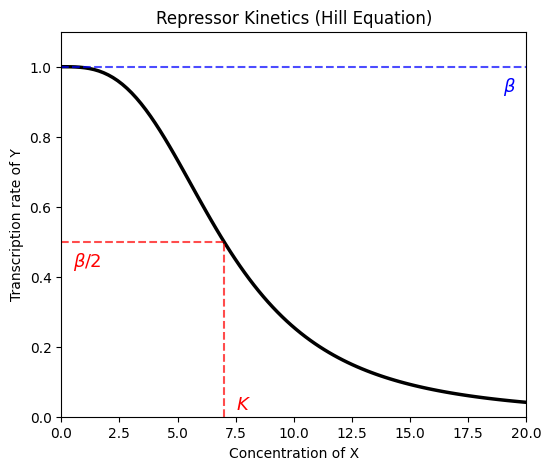

In [24]:
fig = plt.figure(figsize=(6,5))

plt.plot(x,hill_repress(x,beta,K,n),'k-',linewidth=2.5)
plt.plot([0,K],[beta/2,beta/2],'r--',linewidth=1.5,alpha=0.7)
plt.plot([K,K],[0,beta/2],'r--',linewidth=1.5,alpha=0.7)
plt.plot([x[0],x[-1]],[beta,beta],'b--',linewidth=1.5,alpha=0.7)

plt.text(K+0.025*x[-1],0.02*beta,"$K$",color='red',fontsize=13)
plt.text(0.025*x[-1],beta/2-0.07*beta,"$\\beta/2$",color='red',fontsize=13)
plt.text(x[-1]-0.05*x[-1],beta-0.07*beta,"$\\beta$",color='blue',fontsize=13)

plt.xlim([x[0],x[-1]])
plt.ylim([0,beta+0.1])
plt.title("Repressor Kinetics (Hill Equation)")
plt.xlabel('Concentration of X')
plt.ylabel('Transcription rate of Y')

##### Interpretation: 
When the concentration $x$ of an repressor $X$ is higher, we assume that more molecules of $X$ are bound to the DNA (i.e., higher likelihood that more molecules are bound). In turn, this increases the rate at which further molecules of $X$ bind to the DNA, which <b> decreases </b> the rate at which the DNA is transcribed. There is limited space for molecules to bind in the promoter region, so the transcription rate law saturates past a certain point of $x$ to total repression of transcription, i.e., $r(x) = 0$.

#### Breakout groups: ~5 mins
Change the parameters $\beta,K,$ and $n$, and see how the Hill functions change.

### Large $n$ limit of Hill function: Heaviside step function

In general, the the Hill coefficient $n$ governs the steepness of the Hill function. What happens as $n$ becomes very large? I.e., when a large number of molecules of $X$ must be bound to the DNA before getting a significant effect on the transcription (activation or repression).

In [25]:
beta = 4
K = 7

x = np.linspace(0,20,100)

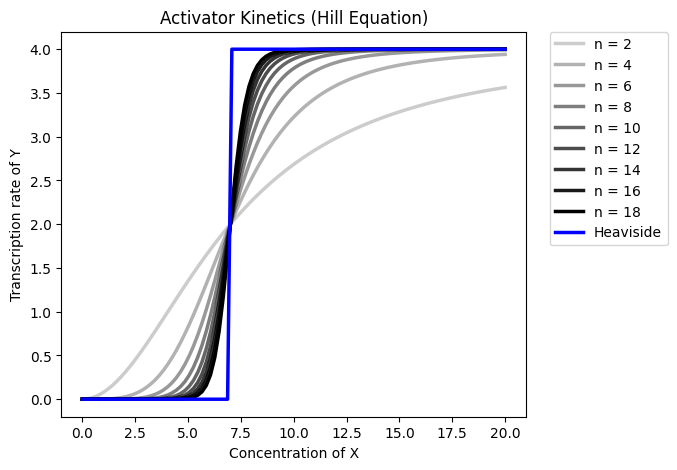

In [26]:
# Activator Kinetics
fig = plt.figure(figsize=(6,5))
opacities = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for n in range(2,20,2):
    plt.plot(x,hill_activate(x,beta,K,n),'k-',linewidth=2.5,alpha=opacities[int(n/2)-1],label="n = "+str(n))
    
plt.plot(x,beta*np.heaviside(x-K,1),'b-',linewidth =2.5,label="Heaviside")

plt.title("Activator Kinetics (Hill Equation)")
plt.xlabel('Concentration of X')
plt.ylabel('Transcription rate of Y')
plt.legend(loc=(1.05,0.445))

The limiting function as $n \to \infty$ for the activator rate law is a shifted and scaled Heaviside step function, $\beta H(x -K)$, where
$$
H(x) = \begin{cases} 1 \quad & x \geqslant 0  \\ 0 & x<0 \end{cases} ~.
$$
Another way to express this function is using the Boolean indicator function $\mathbf{1}$:
$$
\mathbf{1}(A) = \begin{cases} 1 \quad & A \text{ is True} \\ 0 & A \text{ is False} \end{cases} \, .
$$
That is, $H(x) = \mathbf{1}(x\geqslant 0)$, and $\beta H(x-K) = \beta\,  \mathbf{1}(x\geqslant K)$.

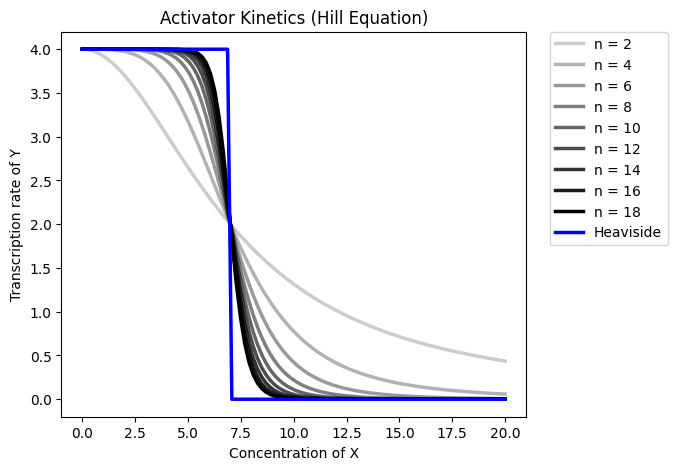

In [27]:
# Repressor Kinetics
fig = plt.figure(figsize=(6,5))
opacities = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for n in range(2,20,2):
    plt.plot(x,hill_repress(x,beta,K,n),'k-',linewidth=2.5,alpha=opacities[int(n/2)-1],label="n = "+str(n))
    
plt.plot(x,beta*(1-np.heaviside(x-K,1)),'b-',linewidth =2.5,label="Heaviside")

plt.title("Activator Kinetics (Hill Equation)")
plt.xlabel('Concentration of X')
plt.ylabel('Transcription rate of Y')
plt.legend(loc=(1.05,0.445))

We see a similar phenomenon for the repressor kinetics: the limiting function as $n \to \infty$ for the repressor Hill function rate law is a shifted and scaled step function, now a step down: $\beta\big[ 1 - H(x -K)\big]$.

Another way to express this function is again using the Boolean indicator function $\mathbf{1}$:
$$
\beta\big[ 1 - H(x -K)\big] = \beta \, \mathbf{1}(x < K)
$$

Thus, in the $n\to \infty$ limit, we can express the Hill function rate laws in terms of the Boolean indicator function. That is, when $x$ is above or below a threshold value $K$, we get an "all or nothing" response in terms of transcription of gene $Y$.

## Boolean kinetics

Thus, using "Boolean kinetics" in this way is a way to simplify the rate laws for regulation of gene transcription, where $n$ is assumed to be sufficiently large (i.e., we have a "good" approximation to the Hill function). More broadly, using Boolean functions (i.e., logic-based functions) for these rate laws is an easy way to account for genes that have multiple regulators.

### Examples of Boolean functions: gene activation
Consider a gene $Y$ that is regulated by two activators $X_1$ and $X_2$. What are some possible rate laws to describe the transcription rate of $Y$ as a function of the concentrations $x_1$ and $x_2$ of these two activators?

1. <b> AND logic gate:</b> Both $X_1$ AND $X_2$ must be present at "high enough" levels for $Y$ to be transcribed.
$$
\begin{align*}
r(x_1,x_2) &= \beta \, \mathbf{1}\big(x_1 \geqslant K_1 \text{ AND } x_2 \geqslant K_2\big) \\
&= \beta \, \mathbf{1}(x_1 \geqslant K_1) \, \mathbf{1}(x_2 \geqslant K_2) \\
&= \begin{cases} \beta \quad & x_1 \geqslant K_1 \text{ AND } x_2 \geqslant K_2 \\
0 & \text{else}
\end{cases}
\end{align*}
$$

In [2]:
def and_gate(x1,x2,K1,K2):
    if x1 >= K1 and x2 >= K2:
        return 1
    else:
        return 0
    
# Example: x1 < K1 and x2 >= K2, should return 0
print(and_gate(3,4,5,2))

0


2. <b> OR logic gate:</b> Either $X_1$ OR $X_2$ must be present at "high enough" levels for $Y$ to be transcribed (note: not exclusive OR, could have both).
$$
\begin{align*}
r(x_1,x_2) &= \beta \, \mathbf{1}\big(x_1 \geqslant K_1 \text{ OR } x_2 \geqslant K_2\big) \\
&= \beta \, \text{max}\big\{ \mathbf{1}(x_1 \geqslant K_1) \, , \, \mathbf{1}(x_2 \geqslant K_2) \big\} \\
&= \begin{cases} \beta \quad & x_1 \geqslant K_1 \text{ OR } x_2 \geqslant K_2 \\
0 & \text{else}
\end{cases}
\end{align*}
$$

In [31]:
def or_gate(x1,x2,K1,K2):
    if x1 >= K1 or x2 >= K2:
        return 1
    else:
        return 0

# Example: x1 < K1 and x2 >= K2, should return 1
print(or_gate(3,4,5,2))

1


3. <b> Additive effect:</b> Either $X_1$ OR $X_2$ must be present at "high enough" levels for $Y$ to be transcribed. However, presence of both has a cumulative effect, unlike the OR gate.
$$
\begin{align*}
r(x_1,x_2) &= \beta_1 \, \mathbf{1}\big(x_1 \geqslant K_1\big) + \beta_2 \mathbf{1} \big(x_2 \geqslant K_2\big) \\
&= \begin{cases} 
\beta_1 + \beta_2 \quad & x_1 \geqslant K_1 \text{ AND } x_2 \geqslant K_2 \\
\beta_1 \quad & x_1 \geqslant K_1 \text{ AND } x_2 < K_2 \\
\beta_2 \quad & x_1 < K_1 \text{ AND } x_2 \geqslant K_2 \\
0 & x_1 < K_1 \text{ AND } x_2 < K_2
\end{cases}
\end{align*}
$$

In [32]:
def additive_gate(x1,x2,K1,K2,beta1,beta2):
    if x1 >= K1 and x2 >= K2:
        return beta1+beta2
    elif x1 >= K1: # failed above condition, one must be below threshold, check if x1 >= K1
        return beta1
    elif x2 >= K2: # ... or if x2 >= K2 is satisfied
        return beta2
    else: # both less than thresholds
        return 0
    
# Example: x1 < K1 and x2 >= K2, should return beta2
print(additive_gate(3,4,5,2,1,2))

2


### Examples of Boolean functions: gene activation & repression

Consider a gene $Y$ that is <i>activated</i> by $X_1$ and <i>repressed</i> by $X_2$. What are the different rate laws interms of logic gates in this scenario?

- <b>OR logic gate:</b> $X_1$ must be present at "high enough" levels OR $X_2$ must be present at "low enough" levels for $Y$ to be transcribed.
$$
\begin{align*}
r(x_1,x_2) &= \beta \, \mathbf{1}\big(x_1 \geqslant K_1 \text{ OR } x_2 < K_2\big) \\
&= \beta \, \max\big\{ \mathbf{1}(x_1 \geqslant K_1) \, , \, \mathbf{1}(x_2 < K_2) \big\} \\
&= \begin{cases} \beta \quad & x_1 \geqslant K_1 \text{ OR } x_2 < K_2 \\
0 & \text{else}
\end{cases}
\end{align*}
$$

In [4]:
def or_gate2(x1,x2,K1,K2):
    if x1 >= K1 or x2 < K2:
        return 1
    else:
        return 0
    
# Example: x1 >= K1 and x2 >= K2, should return 1
print(or_gate2(3,4,2,3))

1


#### Breakout groups: 
Write down/code up the other two rate laws (AND, additive) for this example.